In [1]:
import zipfile
import tensorflow as tf
import numpy as np
import os 
import pathlib 
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Dense, Input, Flatten, MaxPool2D, Activation
from tensorflow.keras import Sequential
%matplotlib inline 

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-09-11 19:09:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   137MB/s    in 0.8s    

2022-09-11 19:09:53 (137 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
#turn training path into a Python path
data_dir = pathlib.Path("pizza_steak/train/")
#creates list of class names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))  

In [3]:
def viewRandomImg(target_dir, target_class):
  #setup targ dir (view imgs from here )
  target_folder = target_dir + target_class
  #get random img path
  random_image = random.sample(os.listdir(target_folder), 1)
  #read in the img and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Img shape: {img.shape}")
  return img


def plotLossAndAccuracy(history, m):
  #helper function block
  history_number = input("Enter the history number: ")
  nodes = input("Enter the node settings: ")
  epochz = input("How many epochs? ")
  opt = input("Enter the optimizer: ")
  settings = f"HISTORY NUMBER:{history_number}===>{epochz}E, OPT:{opt}, NODES:{nodes}"
  train_loss = history.history["loss"]
  train_acc = history.history["accuracy"]
  val_loss = history.history["val_loss"]
  val_acc = history.history["val_accuracy"]
  fig = plt.figure(figsize=(20,10))
  #subplot1
  ax = fig.add_subplot(121)
  ax.plot(range(len(train_loss)), train_loss, label="Train Loss", color="red");
  ax.plot(range(len(val_loss)), val_loss, label="Validation Loss", color="blue");
  plt.xlabel("Epochs"); plt.ylabel("Loss");
  plt.title("Train Loss vs Validation Loss");
  plt.legend(loc="best");
  #subplot2
  ax = fig.add_subplot(122)
  ax.plot(range(len(train_acc)), train_acc, label="Train Accuracy", color="red");
  ax.plot(range(len(val_acc)), val_acc, label="Validation Accuracy", color="blue");
  plt.subplots_adjust(wspace=0.5);
  plt.xlabel("Epochs"); plt.ylabel("Accuracy");
  plt.title("\nTrain Accuracy vs Validation Accuracy");
  plt.legend(loc="best");
  plt.suptitle(settings, ha="center", fontsize=18, bbox={"alpha":0.5, "pad":1})
  lossTest, accuracyTest = m.evaluate(test_data)
  lossTrain, accuracyTrain = m.evaluate(train_data_augmented_shuffled)
  plt.figtext(0.5, -0.1, f"Model loss on the test set: {round((lossTest * 100), 2)}%\n Model accuracy on the test set: {round((accuracyTest * 100), 2)}%", ha="center", fontsize=18, bbox={"facecolor":"orange",   "alpha":0.5, "pad":3})
  #plt.set_cmap('inferno')
  print(f"Model loss on the test set: {round((lossTest * 100), 2)}%")
  print(f"Model accuracy on the test set: {round((accuracyTest * 100), 2)}%")
  print(settings)

In [4]:
def plotLossAndBinaryAccuracy(history, m):
  history_number = input("Enter the history number: ")
  nodes = input("Enter the node settings: ")
  epochz = input("How many epochs? ")
  opt = input("Enter the optimizer: ")
  settings = f"HISTORY NUMBER:{history_number}===>{epochz}E, OPT:{opt}, NODES:{nodes}"
  train_loss = history.history["loss"]
  train_acc = history.history["mae"]
  val_loss = history.history["val_loss"]
  val_acc = history.history["val_mae"]
  fig = plt.figure(figsize=(20,10))
  ax = fig.add_subplot(121)
  ax.plot(range(len(train_loss)), train_loss, label="Train Loss", color="red");
  ax.plot(range(len(val_loss)), val_loss, label="Validation Loss", color="blue");
  plt.xlabel("Epochs"); plt.ylabel("Loss");
  plt.title("Train Loss vs Validation Loss");
  plt.legend(loc="best");
  ax = fig.add_subplot(122)
  ax.plot(range(len(train_acc)), train_acc, label="Train mae", color="red");
  ax.plot(range(len(val_acc)), val_acc, label="Validation mae", color="blue");
  plt.subplots_adjust(wspace=0.5);
  plt.xlabel("Epochs"); plt.ylabel("mae");
  plt.title("\nTrain Accuracy vs Validation Accuracy");
  plt.legend(loc="best");
  plt.suptitle(settings, ha="center", fontsize=18, bbox={"alpha":0.5, "pad":1})
  lossTest, accuracyTest = m.evaluate(test_data)
  lossTrain, accuracyTrain = m.evaluate(train_data_augmented_shuffled)
  plt.figtext(0.5, -0.1, f"Model loss on the test set: {round((lossTest * 100), 2)}%\n Model accuracy on the test set: {round((accuracyTest * 100), 2)}%", ha="center", fontsize=18, bbox={"facecolor":"orange",   "alpha":0.5, "pad":3})
  #plt.set_cmap('inferno')
  print(f"Model loss on the test set: {round((lossTest * 100), 2)}%")
  print(f"Model accuracy on the test set: {round((accuracyTest * 100), 2)}%")
  print(settings)

Img shape: (512, 512, 3)


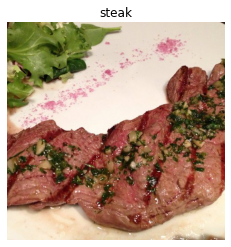

In [6]:
img = viewRandomImg(target_dir="pizza_steak/train/",
                    target_class="steak")

In [7]:
#normalize img pixel info...img.max() = 255
img / 255

array([[[0.29411765, 0.11764706, 0.09803922],
        [0.29019608, 0.12156863, 0.09411765],
        [0.24705882, 0.10196078, 0.03137255],
        ...,
        [0.18823529, 0.10588235, 0.08627451],
        [0.19607843, 0.11372549, 0.09411765],
        [0.20392157, 0.12156863, 0.10196078]],

       [[0.26666667, 0.09019608, 0.07058824],
        [0.25882353, 0.10196078, 0.07058824],
        [0.23921569, 0.09803922, 0.03529412],
        ...,
        [0.20392157, 0.1254902 , 0.09803922],
        [0.19215686, 0.10980392, 0.09019608],
        [0.17647059, 0.09411765, 0.0745098 ]],

       [[0.24705882, 0.0745098 , 0.0627451 ],
        [0.23921569, 0.08235294, 0.05098039],
        [0.23137255, 0.10196078, 0.03529412],
        ...,
        [0.15294118, 0.07843137, 0.05098039],
        [0.18039216, 0.10588235, 0.07843137],
        [0.21176471, 0.1372549 , 0.10980392]],

       ...,

       [[0.96078431, 0.94901961, 0.8745098 ],
        [0.96862745, 0.94901961, 0.8745098 ],
        [0.96470588, 0

In [8]:
tf.random.set_seed(42)

#preprocess data(get all pixel vals between 0-1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup train and test dirs
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#import data from dirs and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, #imgs to process at a time
                                               target_size=(224,224), #convert all to be 224x224
                                               class_mode="binary", #type of problem we are workin on(pizza or steak)
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32, #imgs to process at a time
                                               target_size=(224,224), #convert all to be 224x224
                                               class_mode="binary", #type of problem we are workin on(pizza or steak)
                                               seed=42)

rose1 = tf.keras.Sequential([
                            tf.keras.layers.Conv2D(filters=10,
                                                   kernel_size=3, #can also be (3,3)
                                                   activation="relu",
                                                   input_shape=(224,224,3)),
                             tf.keras.layers.Conv2D(10, 3, activation="relu"),
                             tf.keras.layers.MaxPool2D(pool_size=2,
                                                       padding="valid"),
                             tf.keras.layers.Conv2D(10, 3, activation="relu"),
                             tf.keras.layers.Conv2D(10, 3, activation="relu"),
                             tf.keras.layers.MaxPool2D(2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

rose1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Nadam(),
              metrics=["accuracy"])

history1 = rose1.fit(train_data,
                     epochs=10,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 23s 217ms/step - loss: 0.5834 - accuracy: 0.7047 - val_loss: 0.4306 - val_accuracy: 0.8000
Epoch 2/10
47/47 [==============================] - 10s 213ms/step - loss: 0.4157 - accuracy: 0.8147 - val_loss: 0.5539 - val_accuracy: 0.7240
Epoch 3/10
47/47 [==============================] - 10s 212ms/step - loss: 0.4050 - accuracy: 0.8240 - val_loss: 0.3274 - val_accuracy: 0.8560
Epoch 4/10
47/47 [==============================] - 11s 225ms/step - loss: 0.3212 - accuracy: 0.8620 - val_loss: 0.4186 - val_accuracy: 0.8100
Epoch 5/10
47/47 [==============================] - 10s 211ms/step - loss: 0.2751 - accuracy: 0.8827 - val_loss: 0.2769 - val_accuracy: 0.8820
Epoch 6/10
47/47 [==============================] - 10s 211ms/step - loss: 0.2497 - accuracy: 0.8927 - val_loss: 0.3213 - val_accuracy: 0.8540
Epoch 7/10
47/47 [==============================] - 11s 233

In [ ]:
rose1 = tf.keras.Sequential([
                            tf.keras.layers.Conv2D(filters=10,
                                                   kernel_size=3, #can also be (3,3)
                                                   activation="relu",
                                                   input_shape=(224,224,3)),
                             tf.keras.layers.Conv2D(10, 3, activation="relu"),
                             tf.keras.layers.MaxPool2D(pool_size=2,
                                                       padding="valid"),
                             tf.keras.layers.Conv2D(10, 3, activation="relu"),
                             tf.keras.layers.Conv2D(10, 3, activation="relu"),
                             tf.keras.layers.MaxPool2D(2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

rose1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history2 = rose1.fit(train_data,
                     epochs=0,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))

In [ ]:
rose2 = tf.keras.Sequential([
                            tf.keras.layers.Conv2D(filters=10,
                                                   kernel_size=3, #can also be (3,3)
                                                   activation="relu",
                                                   input_shape=(224,224,3)),
                             tf.keras.layers.Conv2D(10, 3, activation="relu"),
                             tf.keras.layers.MaxPool2D(pool_size=2,
                                                       padding="valid"),
                             tf.keras.layers.Conv2D(10, 3, activation="relu"),
                             tf.keras.layers.Conv2D(10, 3, activation="relu"),
                             tf.keras.layers.MaxPool2D(2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

rose2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history3 = rose1.fit(train_data,
                     epochs=0,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))

In [ ]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history3 = model_1.fit(train_data,
                        epochs=0,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
rose3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
rose3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Nadam(),
              metrics=["accuracy"])

# Fit the model
history4 = model_1.fit(train_data,
                        epochs=0,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#further preprocessing that prevents overfitting and makes it more generalizable(able to handle multiple data qualities)
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
#HERE WE WILL TRAIN WITH AUGMENTED DATA, BUT VALIDATE AGAINST REGULAR DATA(PREVENTS OVERFITTING AND CONFUSES IT, IN A GOOD WAY...CONSIDER A "CHALLENGE" WHEN YOU ARE LEARNING-IT MAKES YOUR LEARNING MORE EFFECTIVE)

print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(20, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(20, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(20, activation='relu'),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=0,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


In [ ]:

# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [ ]:
rose6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(20, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(20, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(20, activation='relu'),
  Dense(1, activation='sigmoid')
])

# Compile the model
rose6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history7 = rose6.fit(train_data_augmented_shuffled, # changed to augmented training data shuffled
                     epochs=0,
                     steps_per_epoch=len(train_data_augmented_shuffled),
                     validation_data=test_data,
                     validation_steps=len(test_data))

In [ ]:
rose6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(20, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(20, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(20, activation='relu'),
  Dense(1, activation='sigmoid')
])

# Compile the model
rose6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Nadam(),
                metrics=['accuracy'])

# Fit the model
history8 = rose6.fit(train_data_augmented_shuffled, # changed to augmented training data shuffled
                     epochs=0,
                     steps_per_epoch=len(train_data_augmented_shuffled),
                     validation_data=test_data,
                     validation_steps=len(test_data))

In [ ]:
X_train = train_data_augmented_shuffled
X_test = test_data

practice = len(X_train) * 3 #practice,practice,practice

In [ ]:
rose7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(20, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(40, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(40, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(40, activation='relu'),
  Dense(1, activation='sigmoid')
])

# Compile the model
rose7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Nadam(),
                metrics=['accuracy'])

# Fit the model
history9 = rose7.fit(train_data_augmented_shuffled, # changed to augmented training data shuffled
                     epochs=0,
                     steps_per_epoch=len(train_data_augmented_shuffled),
                     validation_data=test_data,
                     validation_steps=len(test_data))

In [ ]:
rose7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(20, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(40, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(40, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(40, activation='relu'),
  Dense(1, activation='sigmoid')
])

# Compile the model
rose7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(nesterov=True),
                metrics=['accuracy'])

# Fit the model
history10 = rose7.fit(train_data_augmented_shuffled, # changed to augmented training data shuffled
                     epochs=0,
                     steps_per_epoch=len(train_data_augmented_shuffled),
                     validation_data=test_data,
                     validation_steps=len(test_data))

In [ ]:
rose8 = Sequential([
  Conv2D(22, 3, activation='relu', input_shape=(224, 224, 3)), #<-2/3 of batchsize(32) + 1
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(44, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(88, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(88, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(88, activation='relu'),
  Dense(1, activation='sigmoid')
])

# Compile the model
rose8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Nadam(),
                metrics=['accuracy'])

# Fit the model
history11 = rose8.fit(train_data_augmented_shuffled, # changed to augmented training data shuffled
                     epochs=0,
                     steps_per_epoch=len(train_data_augmented_shuffled),
                     validation_data=test_data,
                     validation_steps=len(test_data))

In [ ]:
srose9 = Sequential([
  Conv2D(22, 3, activation='relu', input_shape=(224, 224, 3)), #<-2/3 of batchsize(32) + 1
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(44, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(66, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(88, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(88, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(88, activation='relu'),
  Dense(1, activation='sigmoid')
])

# Compile the model
rose9.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Nadam(),
                metrics=['accuracy'])

# Fit the model
history12 = rose9.fit(train_data_augmented_shuffled, # changed to augmented training data shuffled
                     epochs=0,
                     steps_per_epoch=len(train_data_augmented_shuffled),
                     validation_data=test_data,
                     validation_steps=len(test_data))

NameError: ignored

rose8 IS THE MOST SUCCESSFULL THUS FAR

In [ ]:
rose8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Nadam(learning_rate=0.002),
              metrics=['accuracy'])

history14 = rose8.fit(train_data_augmented_shuffled, 
                     epochs=0,
                     steps_per_epoch=len(train_data_augmented_shuffled),
                     validation_data=test_data,
                     validation_steps=len(test_data))

history14

In [ ]:
rose8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Nadam(learning_rate=0.002),
              metrics=['accuracy'])

history15 = rose8.fit(train_data_augmented_shuffled, 
                     epochs=practice,
                     steps_per_epoch=len(train_data_augmented_shuffled),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Enter the history number: 15
Enter the node settings: rose8=>C:22,44,88,88,D:88,1(sigmoid)
How many epochs? practice(141)
Enter the optimizer: Nadam(lr=0.002)
47/47 [==============================] - 20s 417ms/step - loss: 0.0931 - accuracy: 0.9693
Model loss on the test set: 26.42%
Model accuracy on the test set: 92.4%
HISTORY NUMBER:15===>practice(141)E, OPT:Nadam(lr=0.002), NODES:rose8=>C:22,44,88,88,D:88,1(sigmoid)


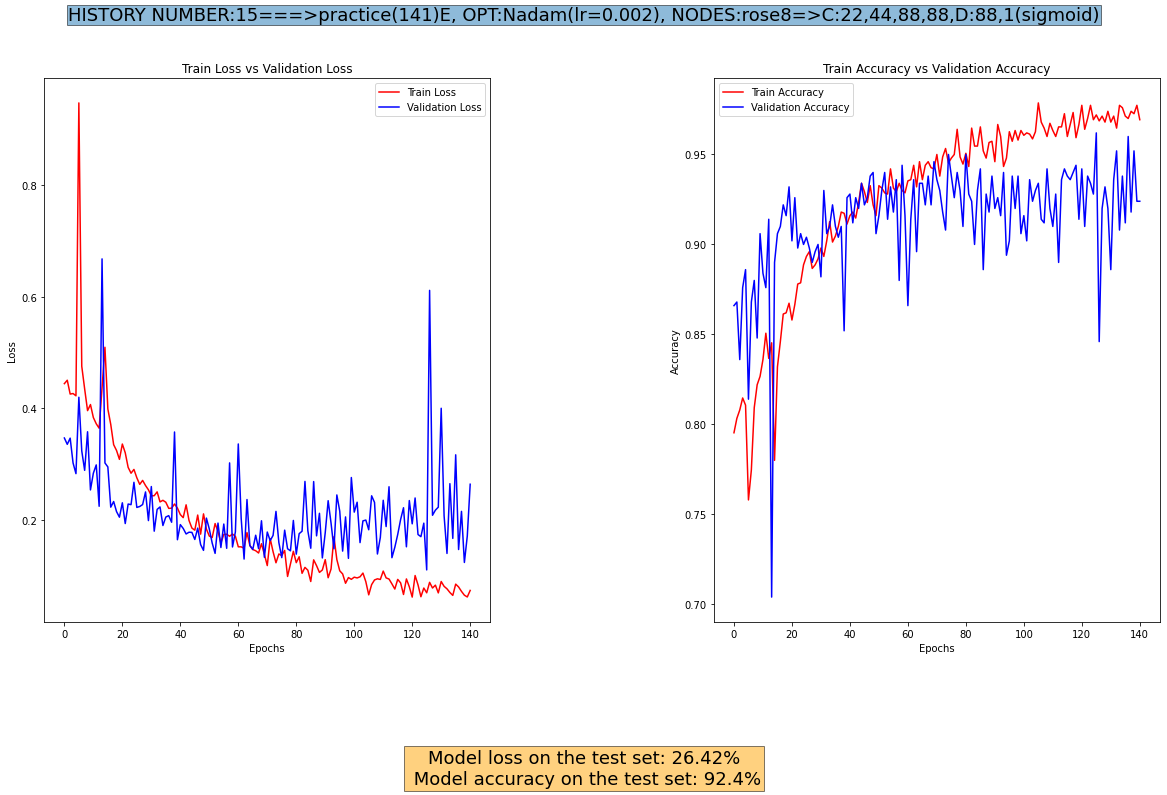

In [ ]:
plotLossAndAccuracy(history15, rose8)

In [ ]:
rose8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 222, 222, 22)      616       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 111, 111, 22)     0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 109, 109, 44)      8756      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 54, 54, 44)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 52, 52, 88)        34936     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 26, 26, 88)     

In [ ]:
rose8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Nadam(learning_rate=0.002),
              metrics=['f1_score'])

In [ ]:
history16 = rose8.fit(train_data_augmented_shuffled, 
                     epochs=11,
                     steps_per_epoch=len(train_data_augmented_shuffled),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Epoch 1/11
47/47 [==============================] - 27s 550ms/step - loss: 0.7467 - binary_accuracy: 0.5273 - val_loss: 0.6788 - val_binary_accuracy: 0.5400
Epoch 2/11
47/47 [==============================] - 24s 508ms/step - loss: 0.7331 - binary_accuracy: 0.5913 - val_loss: 0.5456 - val_binary_accuracy: 0.7640
Epoch 3/11
47/47 [==============================] - 24s 520ms/step - loss: 0.6593 - binary_accuracy: 0.6727 - val_loss: 0.4802 - val_binary_accuracy: 0.7840
Epoch 4/11
47/47 [==============================] - 24s 508ms/step - loss: 0.6398 - binary_accuracy: 0.6473 - val_loss: 0.3960 - val_binary_accuracy: 0.8220
Epoch 5/11
47/47 [==============================] - 24s 507ms/step - loss: 0.5518 - binary_accuracy: 0.7273 - val_loss: 0.4386 - val_binary_accuracy: 0.8240
Epoch 6/11
47/47 [==============================] - 24s 510ms/step - loss: 0.5171 - binary_accuracy: 0.7460 - val_loss: 0.4498 - val_binary_accuracy: 0.8140
Epoch 7/11
47/47 [==============================] - 25s 53

Enter the history number: 16
Enter the node settings: rose8
How many epochs? 11
Enter the optimizer: Nadam(lr=0.002), binary_accuracy
47/47 [==============================] - 21s 440ms/step - loss: 0.4541 - binary_accuracy: 0.7913
Model loss on the test set: 34.14%
Model accuracy on the test set: 87.6%
HISTORY NUMBER:16===>11E, OPT:Nadam(lr=0.002), binary_accuracy, NODES:rose8


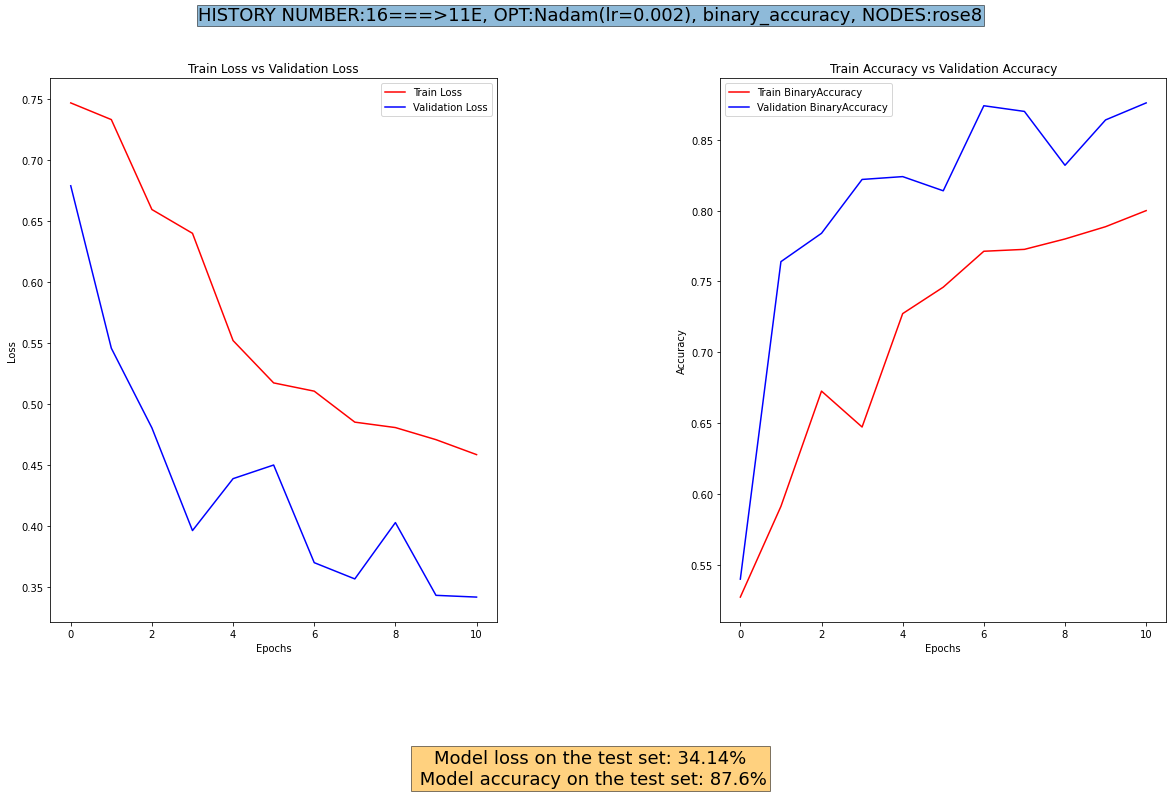

In [ ]:
plotLossAndBinaryAccuracy(history16, rose8)

In [ ]:
rose8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Nadam(learning_rate=0.002),
              metrics=['mae'])

In [ ]:
history17 = rose8.fit(train_data_augmented_shuffled, 
                     epochs=11,
                     steps_per_epoch=len(train_data_augmented_shuffled),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Epoch 1/11
47/47 [==============================] - 28s 563ms/step - loss: 0.4653 - mae: 0.3004 - val_loss: 0.3577 - val_mae: 0.2592
Epoch 2/11
47/47 [==============================] - 26s 565ms/step - loss: 0.4819 - mae: 0.3153 - val_loss: 0.3941 - val_mae: 0.2646
Epoch 3/11
47/47 [==============================] - 25s 536ms/step - loss: 0.4601 - mae: 0.2907 - val_loss: 0.3777 - val_mae: 0.2804
Epoch 4/11
47/47 [==============================] - 24s 509ms/step - loss: 0.4640 - mae: 0.2911 - val_loss: 0.4700 - val_mae: 0.3379
Epoch 5/11
47/47 [==============================] - 32s 680ms/step - loss: 0.4651 - mae: 0.3044 - val_loss: 0.3407 - val_mae: 0.2345
Epoch 6/11
47/47 [==============================] - 28s 590ms/step - loss: 0.4430 - mae: 0.2863 - val_loss: 0.3069 - val_mae: 0.2032
Epoch 7/11
47/47 [==============================] - 24s 515ms/step - loss: 0.4301 - mae: 0.2753 - val_loss: 0.2861 - val_mae: 0.1929
Epoch 8/11
47/47 [==============================] - 24s 498ms/step - 

Enter the history number: 17
Enter the node settings: rose8
How many epochs? 11
Enter the optimizer: Nadam(lr=.002), loss=mae...
47/47 [==============================] - 20s 427ms/step - loss: 0.4295 - mae: 0.2741
Model loss on the test set: 29.31%
Model accuracy on the test set: 20.21%
HISTORY NUMBER:17===>11E, OPT:Nadam(lr=.002), loss=mae..., NODES:rose8


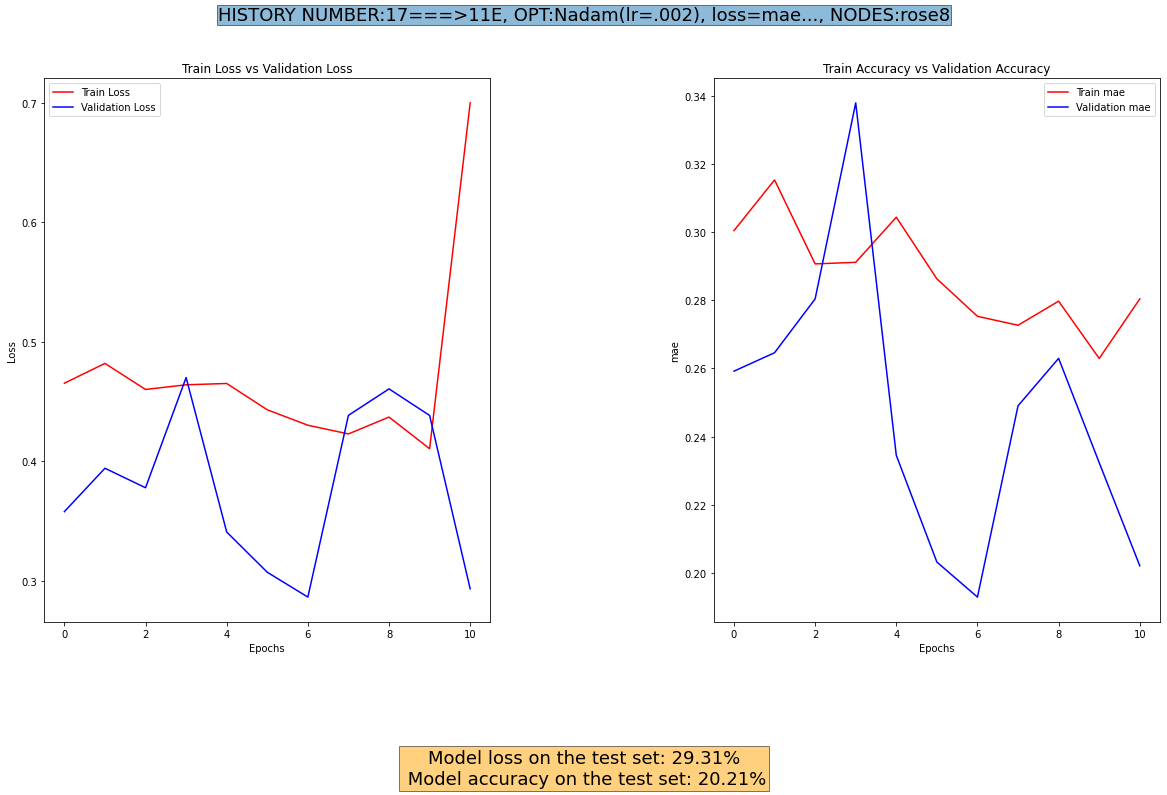

In [ ]:
plotLossAndBinaryAccuracy(history17, rose8)

In [ ]:
rose8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Nadam(learning_rate=0.002),
              metrics=['mae'])

In [ ]:
history18 = rose8.fit(train_data_augmented_shuffled, 
                     epochs=50,
                     steps_per_epoch=len(train_data_augmented_shuffled),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Epoch 1/50
47/47 [==============================] - 23s 472ms/step - loss: 0.5499 - mae: 0.3638 - val_loss: 0.4254 - val_mae: 0.3054
Epoch 2/50
47/47 [==============================] - 21s 454ms/step - loss: 0.5049 - mae: 0.3314 - val_loss: 0.3685 - val_mae: 0.2432
Epoch 3/50
47/47 [==============================] - 21s 454ms/step - loss: 0.4950 - mae: 0.3195 - val_loss: 0.3512 - val_mae: 0.2394
Epoch 4/50
47/47 [==============================] - 22s 471ms/step - loss: 0.4868 - mae: 0.3138 - val_loss: 0.4242 - val_mae: 0.2725
Epoch 5/50
47/47 [==============================] - 21s 456ms/step - loss: 0.4679 - mae: 0.3064 - val_loss: 0.3072 - val_mae: 0.2140
Epoch 6/50
47/47 [==============================] - 22s 459ms/step - loss: 0.4328 - mae: 0.2788 - val_loss: 0.2929 - val_mae: 0.1992
Epoch 7/50
47/47 [==============================] - 22s 475ms/step - loss: 0.4104 - mae: 0.2580 - val_loss: 0.3143 - val_mae: 0.2131
Epoch 8/50
47/47 [==============================] - 21s 454ms/step - 

Enter the history number: 18
Enter the node settings: rose8
How many epochs? 50
Enter the optimizer: HISTORY17(bin_acc, mae)
47/47 [==============================] - 20s 435ms/step - loss: 0.2231 - mae: 0.1217
Model loss on the test set: 13.67%
Model accuracy on the test set: 7.24%
HISTORY NUMBER:18===>50E, OPT:HISTORY17(bin_acc, mae), NODES:rose8


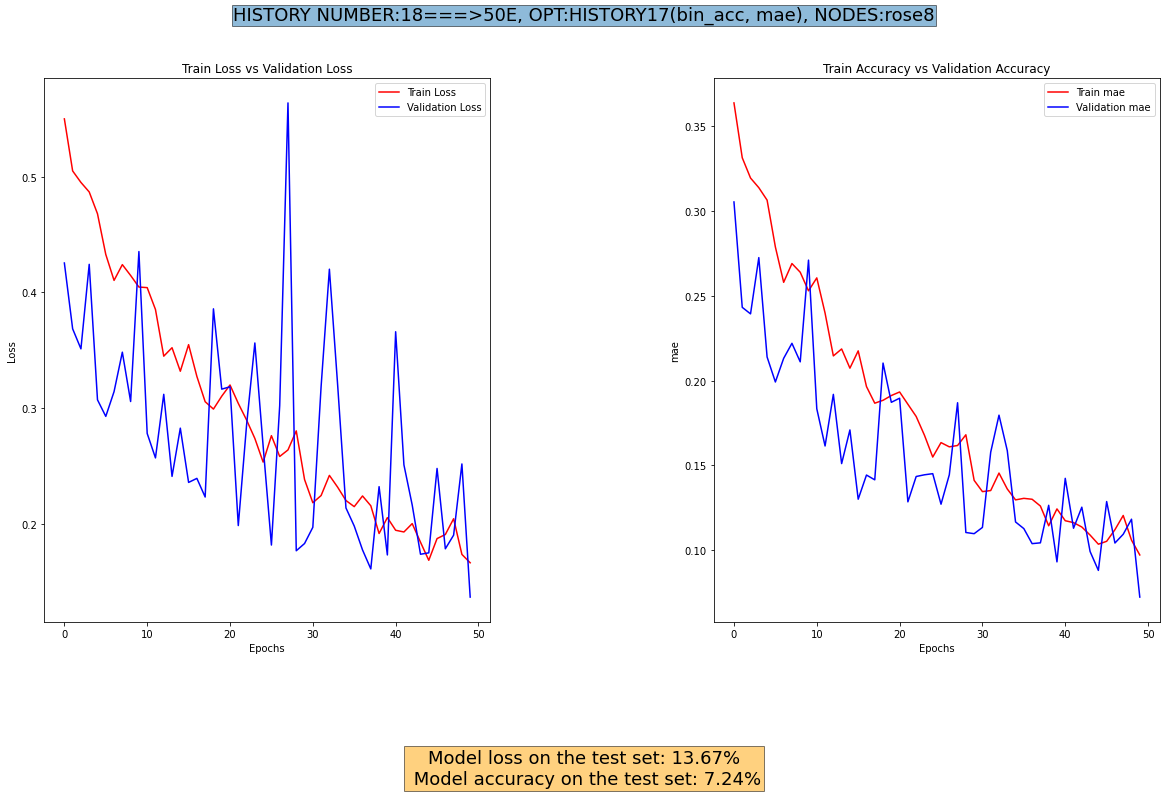

In [ ]:
plotLossAndBinaryAccuracy(history18, rose8)

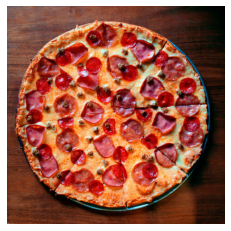

In [ ]:
pizza = mpimg.imread("pizza1.jpeg")
plt.imshow(pizza)
plt.axis(False);

In [ ]:
pizza.shape

(1000, 1000, 3)

In [ ]:
def loadAndPrepImg(filename, img_shape=224):
  #reads an image from filename, turns into a tensor and reshapes it
  #to the (img_shapeH, img_shapeW, color_channel)

  #read in target file
  img = tf.io.read_file(filename)

  #decode file into a tensor and ensure 3 color channels
  #our model is trained on imgs with 3 color chans
  img = tf.image.decode_image(img, channels=3)

  #resize img to the models fance
  img = tf.image.resize(img, size= [img_shape, img_shape])

  #rescale the img for normalization
  img = img/255
  return img

In [ ]:
s1 = loadAndPrepImg('pizza1.jpeg')
s1.shape

TensorShape([224, 224, 3])

In [ ]:
rose8.predict(s1)

ValueError: ignored

In [ ]:
rose8.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 222, 222, 22)      616       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 111, 111, 22)     0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 109, 109, 44)      8756      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 54, 54, 44)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 52, 52, 88)        34936     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 26, 26, 88)     

In [ ]:
#add a new dim at dimension [0]
#pizza = tf.expand_dims(pizza, axis=0)

#same, ... is short for every other dimension
s1 = s1[tf.newaxis, ...]

In [ ]:
s1.shape

TensorShape([1, 224, 224, 3])

In [ ]:
pred1 = rose8.predict(s1)
pred1

array([[2.610496e-05]], dtype=float32)

In [ ]:
class_names 

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
#we can index the predicted class by rounding the prediction prob
pred_class = class_names[int(tf.round(pred1)[0][0])]

In [ ]:
pred_class

'pizza'

In [ ]:
s2 = loadAndPrepImg('steak1.jpeg')
s2.shape

TensorShape([224, 224, 3])

In [ ]:
s2 = s2[tf.newaxis, ...]

In [ ]:
pred2 = rose8.predict(s2)

In [ ]:
pred2Class = class_names[int(tf.round(pred2)[0][0])]
pred2Class 

'steak'